In [1]:
#Practicle Machine Learning Quiz 2
#problem 1
library(AppliedPredictiveModeling)
library(lattice)
library(ggplot2)
data(AlzheimerDisease)
adData = data.frame(diagnosis,predictors)
trainIndex = createDataPartition(adData$diagnosis,p=0.5,list=FALSE)
training = adData[trainIndex,]
testing = adData[-trainIndex,]

ERROR: Error in eval(expr, envir, enclos): could not find function "createDataPartition"


ERROR: Error in `[.data.frame`(adData, trainIndex, ): object 'trainIndex' not found


ERROR: Error in `[.data.frame`(adData, -trainIndex, ): object 'trainIndex' not found


In [4]:
#problem 2
data(concrete)
library(caret)
set.seed(1000)
inTrain = createDataPartition(mixtures$CompressiveStrength, p = 3/4)[[1]]
training = mixtures[ inTrain,]
testing = mixtures[-inTrain,]

In [16]:
library(Hmisc)

In [17]:
str(training)

'data.frame':	774 obs. of  9 variables:
 $ Cement             : num  0.2231 0.1492 0.0853 0.1705 0.1705 ...
 $ BlastFurnaceSlag   : num  0 0.0639 0.0569 0.0426 0.0426 ...
 $ FlyAsh             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Water              : num  0.0669 0.1023 0.0825 0.1023 0.1023 ...
 $ Superplasticizer   : num  0.00103 0 0 0 0 ...
 $ CoarseAggregate    : num  0.43 0.418 0.42 0.418 0.418 ...
 $ FineAggregate      : num  0.279 0.266 0.355 0.266 0.266 ...
 $ Age                : int  28 270 360 365 28 28 28 90 270 90 ...
 $ CompressiveStrength: num  80 40.3 44.3 43.7 36.5 ...


In [46]:
cutcs<-cut2(training$CompressiveStrength,g=3)

[1] 774   9

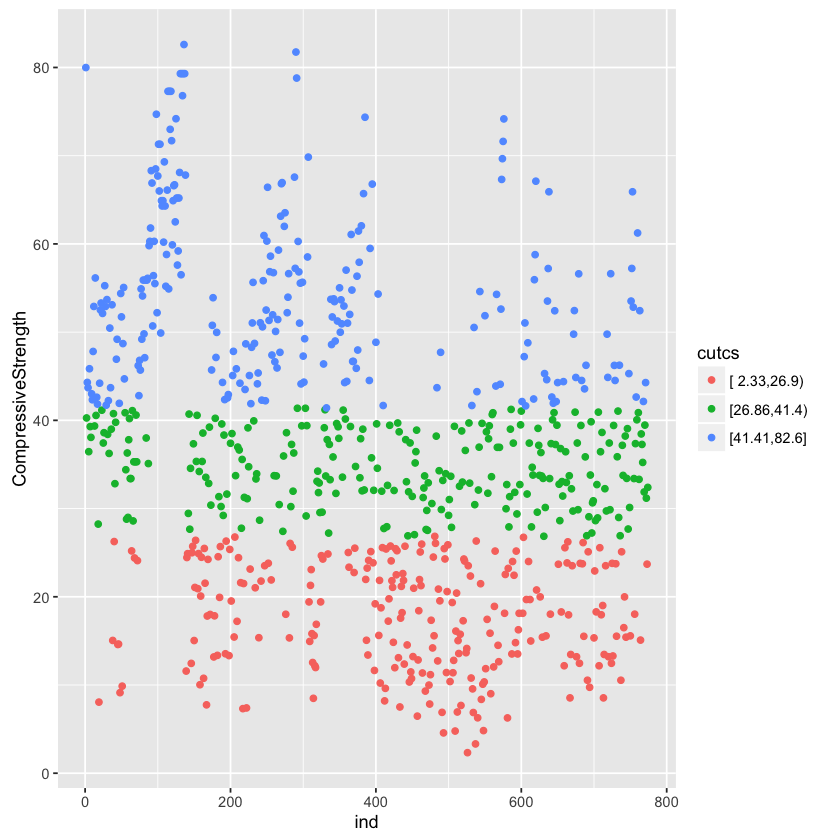

In [47]:
dim(training)
ind<-1:774
qplot(ind, CompressiveStrength,color=cutcs,data=training)

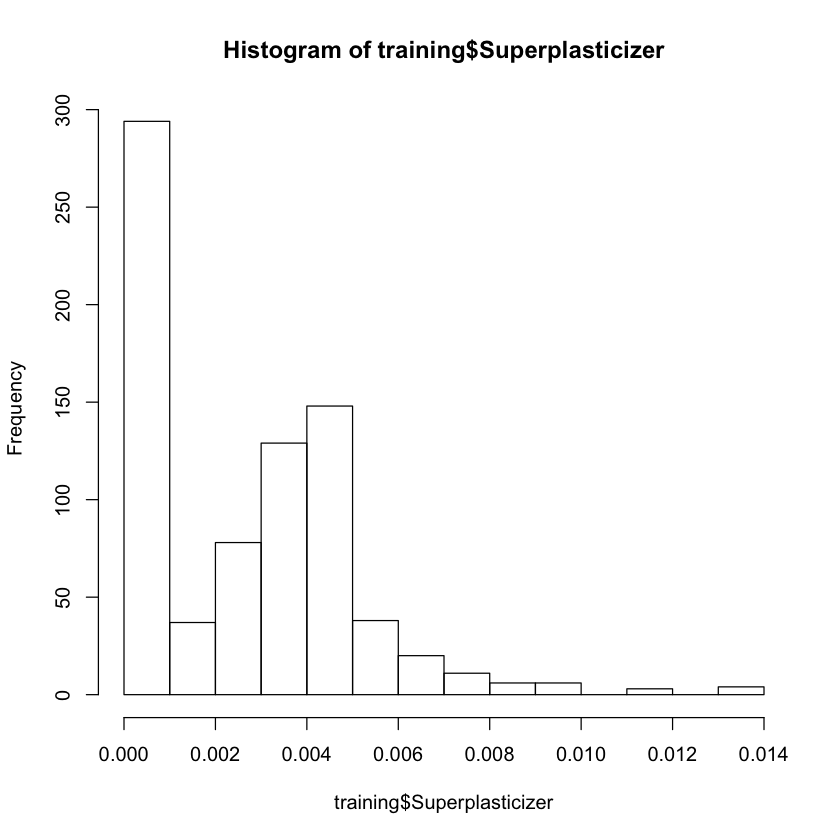

In [24]:
#problem 3
hist(training$Superplasticizer)

In [25]:
head(training)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
1,0.2230944,0,0,0.06692832,0.001032844,0.4296633,0.2792811,28,79.99
3,0.14917,0.06393001,0,0.102288,0,0.4181247,0.2664872,270,40.27
5,0.08534961,0.05689974,0,0.08251322,0,0.4204736,0.3547638,360,44.3
7,0.17048,0.04262001,0,0.102288,0,0.4181247,0.2664872,365,43.7
8,0.17048,0.04262001,0,0.102288,0,0.4181247,0.2664872,28,36.45
9,0.120362,0.05158371,0,0.1031674,0,0.4217195,0.3031674,28,45.85


In [26]:
sum(training$Superplasticizer>0)

[1] 486

In [28]:
sum(training$Superplasticizer==0)

[1] 288

In [29]:
sum(training$Superplasticizer<0)

[1] 0

In [1]:
########Problem 4#######
library(caret)
library(AppliedPredictiveModeling)
set.seed(3433)
data(AlzheimerDisease)
adData = data.frame(diagnosis,predictors)
dim(adData)
inTrain = createDataPartition(adData$diagnosis, p = 3/4)[[1]]
training = adData[ inTrain,]
testing = adData[-inTrain,]
dim(training)
dim(testing)

Loading required package: lattice
Loading required package: ggplot2


[1] 333 131

[1] 251 131

[1]  82 131

In [10]:
###create the new training set with only 12 features and 1 y value.
newtrain<-training[,grep("^IL", names(training))]
newtrain$diagnosis<-training$diagnosis

In [11]:
dim(training) #original training set
dim(newtrain) #new training set with 12 feature, 1 y 

[1] 251 131

[1] 251  13

In [12]:
## 1. train the new training set for parameter.
fitm <- train(diagnosis~.,data=newtrain,method="glm")

In [13]:
##### 2 .use these training parameters to predict new testing set results.
testPC <- predict(fitm,testing)

In [14]:
#### 3. Confusion matrix to see the predicting and test data set. Accuracy is 64%
confusionMatrix(testing$diagnosis,testPC)

Confusion Matrix and Statistics

          Reference
Prediction Impaired Control
  Impaired        2      20
  Control         9      51
                                         
               Accuracy : 0.6463         
                 95% CI : (0.533, 0.7488)
    No Information Rate : 0.8659         
    P-Value [Acc > NIR] : 1.00000        
                                         
                  Kappa : -0.0702        
 Mcnemar's Test P-Value : 0.06332        
                                         
            Sensitivity : 0.18182        
            Specificity : 0.71831        
         Pos Pred Value : 0.09091        
         Neg Pred Value : 0.85000        
             Prevalence : 0.13415        
         Detection Rate : 0.02439        
   Detection Prevalence : 0.26829        
      Balanced Accuracy : 0.45006        
                                         
       'Positive' Class : Impaired       
                                         

In [28]:
###create new training set again with only 12 features.
newtrain<-training[,grep("^IL", names(training))]

In [30]:
### 1. Perform PCA for 80% of variance.
newt <- preProcess(newtrain,method="pca",thres=0.80)
newt

Created from 251 samples and 12 variables

Pre-processing:
  - centered (12)
  - ignored (0)
  - principal component signal extraction (12)
  - scaled (12)

PCA needed 7 components to capture 80 percent of the variance

In [31]:
### 2. PCA transform on the new training set for PCA reduced training set. Only has 7 features.
trainPC <- predict(newt,newtrain)

In [37]:
trainPC$diagnosis<-training$diagnosis

In [38]:
#### 3. Get the fitting parameters for the PCA truncated data set.
modelFit <- train(diagnosis ~., method="glm",data=trainPC)

In [42]:
###4. perform transformation on the testing set for PCA truncated testing set.
testPC <- predict(newt,testing)
##5.& 6. get the prediction for the truncated PCA testing set, find confusion matrix.
confusionMatrix(testing$diagnosis,predict(modelFit,testPC))

Confusion Matrix and Statistics

          Reference
Prediction Impaired Control
  Impaired        3      19
  Control         4      56
                                          
               Accuracy : 0.7195          
                 95% CI : (0.6094, 0.8132)
    No Information Rate : 0.9146          
    P-Value [Acc > NIR] : 1.000000        
                                          
                  Kappa : 0.0889          
 Mcnemar's Test P-Value : 0.003509        
                                          
            Sensitivity : 0.42857         
            Specificity : 0.74667         
         Pos Pred Value : 0.13636         
         Neg Pred Value : 0.93333         
             Prevalence : 0.08537         
         Detection Rate : 0.03659         
   Detection Prevalence : 0.26829         
      Balanced Accuracy : 0.58762         
                                          
       'Positive' Class : Impaired        
                                          

In [1]:
##########Quiz 3
######Problem 1
library(AppliedPredictiveModeling)
data(segmentationOriginal)
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [2]:
dim(segmentationOriginal)

[1] 2019  119

In [6]:
#inTrain <- createDataPartition(segmentationOriginal$Case, p=0.7, list=FALSE)
#training <- segmentationOriginal[inTrain,]
#testing <- segmentationOriginal[-inTrain,]
training<-subset(segmentationOriginal,Case=="Train")
testing<-subset(segmentationOriginal,Case=="Test")
dim(training); dim(testing)

[1] 1009  119

[1] 1010  119

In [7]:
set.seed(125)
modFit <- train(Class ~ .,method="rpart",data=training)
#print(modFit$finalModel)

Loading required package: rpart


Rattle: A free graphical interface for data mining with R.
Version 4.1.0 Copyright (c) 2006-2015 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


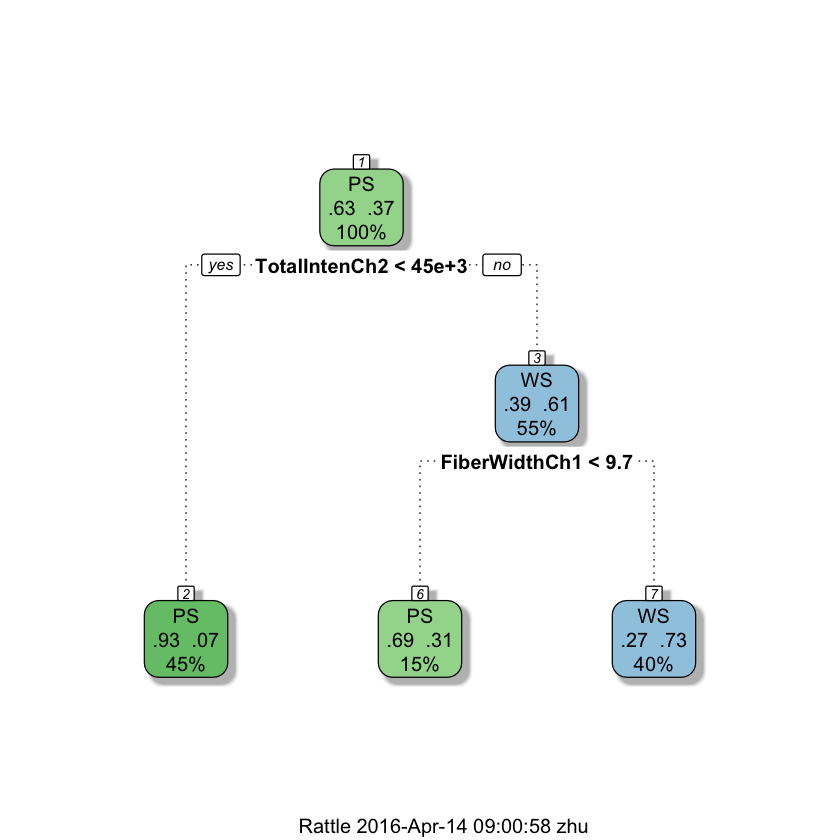

In [8]:
library(rattle)
fancyRpartPlot(modFit$finalModel)

In [16]:
###########Problem 3
library(pgmm)
data(olive)
olive = olive[,-1]

In [17]:
str(olive)
sum(is.na(olive))

'data.frame':	572 obs. of  9 variables:
 $ Area       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Palmitic   : num  1075 1088 911 966 1051 ...
 $ Palmitoleic: num  75 73 54 57 67 49 66 61 60 55 ...
 $ Stearic    : num  226 224 246 240 259 268 264 235 239 213 ...
 $ Oleic      : num  7823 7709 8113 7952 7771 ...
 $ Linoleic   : num  672 781 549 619 672 678 618 734 709 633 ...
 $ Linolenic  : num  36 31 31 50 50 51 49 39 46 26 ...
 $ Arachidic  : num  60 61 63 78 80 70 56 64 83 52 ...
 $ Eicosenoic : num  29 29 29 35 46 44 29 35 33 30 ...


[1] 0

In [19]:
#olive$Area<-factor(olive$Area)
summary(olive$Area)
#olive$Area
modFit <- train(Area ~ .,method="rpart2",data=olive)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     3.0     4.6     7.0     9.0 

In [20]:
olive$Area<-as.numeric(olive$Area)
summary(olive$Area)
#olive$Area
newdata = as.data.frame(t(colMeans(olive)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     3.0     4.6     7.0     9.0 

In [21]:
pred <- predict(modFit,newdata)
pred

1 
2.875

In [28]:
########Problem 4
library(ElemStatLearn)
data(SAheart)
set.seed(8484)
train = sample(1:dim(SAheart)[1],size=dim(SAheart)[1]/2,replace=F)
trainSA = SAheart[train,]
testSA = SAheart[-train,]

In [29]:
set.seed(13234)
str(trainSA)

'data.frame':	231 obs. of  10 variables:
 $ sbp      : int  176 174 174 166 130 128 112 106 126 144 ...
 $ tobacco  : num  5.76 0 3.5 4.1 0.05 0.04 0.41 1.08 0 6.75 ...
 $ ldl      : num  4.89 8.46 5.26 4 2.44 8.22 1.88 4.37 5.29 5.45 ...
 $ adiposity: num  26.1 35.1 22 34.3 28.2 ...
 $ famhist  : Factor w/ 2 levels "Absent","Present": 2 2 2 2 2 1 1 1 1 1 ...
 $ typea    : int  46 35 36 32 67 65 39 67 25 53 ...
 $ obesity  : num  27.3 25.3 22 29.5 30.9 ...
 $ alcohol  : num  19.44 0 8.33 8.23 40.32 ...
 $ age      : int  57 61 59 53 34 24 27 28 45 43 ...
 $ chd      : int  0 1 1 0 0 0 0 1 0 1 ...


In [30]:
#trainSA$chd <- factor(trainSA$chd)
modFit <- train(chd ~ tobacco+ldl+age+alcohol+obesity+typea,method="glm",data=trainSA,family="binomial")

Warning message:
In train.default(x, y, weights = w, ...): You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.

In [31]:
missClass = function(values,prediction){sum(((prediction > 0.5)*1) != values)/length(values)}

In [41]:
pred <- predict(modFit,testSA)
missClass(testSA$chd,pred)

[1] 0.3116883

In [42]:
pred <- predict(modFit,trainSA)
missClass(trainSA$chd,pred)

[1] 0.2727273

In [43]:
#######Problem 5
library(ElemStatLearn)
data(vowel.train)
data(vowel.test)

In [44]:
vtr<-vowel.train
vte<-vowel.test

In [45]:
set.seed(33833)

In [46]:
str(vtr)

'data.frame':	528 obs. of  11 variables:
 $ y   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ x.1 : num  -3.64 -3.33 -2.12 -2.29 -2.6 ...
 $ x.2 : num  0.418 0.496 0.894 1.809 1.938 ...
 $ x.3 : num  -0.67 -0.694 -1.576 -1.498 -0.846 ...
 $ x.4 : num  1.779 1.365 0.147 1.012 1.062 ...
 $ x.5 : num  -0.168 -0.265 -0.707 -1.053 -1.633 ...
 $ x.6 : num  1.627 1.933 1.559 1.06 0.764 ...
 $ x.7 : num  -0.388 -0.363 -0.579 -0.567 0.394 0.217 0.322 -0.435 -0.512 -0.466 ...
 $ x.8 : num  0.529 0.51 0.676 0.235 -0.15 -0.246 0.45 0.992 0.928 0.702 ...
 $ x.9 : num  -0.874 -0.621 -0.809 -0.091 0.277 0.238 0.377 0.575 -0.167 0.06 ...
 $ x.10: num  -0.814 -0.488 -0.049 -0.795 -0.396 -0.365 -0.366 -0.301 -0.434 -0.836 ...


In [47]:
modFit <- train(y~ .,data=vtr,method="rf", importance=T)

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [48]:
varImp(modFit)

rf variable importance

     Overall
x.1  100.000
x.2   90.437
x.6   48.311
x.8   28.454
x.5   24.944
x.3   14.472
x.9   11.287
x.10   7.551
x.4    5.444
x.7    0.000

In [54]:
set.seed(33833)
a <- randomForest(y ~ ., data = vowel.train, importance = FALSE)
varImp(a)

ERROR: Error in varImp[, "%IncMSE"]: subscript out of bounds


In [222]:
######These results have different answer
set.seed(33833)
modFit <- train(y~ .,data=vowel.train,method="rf", importance=FALSE)
varImp(modFit)

rf variable importance

     Overall
x.1  100.000
x.2   93.548
x.5   41.699
x.6   27.438
x.8   18.965
x.4    9.033
x.3    6.735
x.9    4.706
x.7    1.903
x.10   0.000

In [55]:
########Quiz 4
##########Problem 1
pred<-predict(modFit,vte)
modFit
confusionMatrix(pred,vte$y)

Random Forest 

528 samples
 10 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 528, 528, 528, 528, 528, 528, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   RMSE SD     Rsquared SD
   2    1.039674  0.9113888  0.09204289  0.01797925 
   6    1.029545  0.8984472  0.09941409  0.02085739 
  10    1.123031  0.8737148  0.14258139  0.03242075 

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was mtry = 6. 

ERROR: Error in confusionMatrix.default(pred, vte$y): the data cannot have more levels than the reference


In [58]:
modFit2 <- train(y~ .,data=vowel.train,method="gbm",verbose=FALSE)
pred2<-predict(modFit2,vte)

In [60]:
head(vte$y)
head(pred2)
confusionMatrix(pred2,vowel.test$y)

[1] 1 2 3 4 5 6

[1] 0.9066882 1.7642205 2.9628920 3.9607243 6.7442995 7.9755531

ERROR: Error in confusionMatrix.default(pred2, vowel.test$y): the data cannot have more levels than the reference


In [171]:
#########Problem 2
library(gbm)
set.seed(3433)
library(AppliedPredictiveModeling)
data(AlzheimerDisease)

adData = data.frame(diagnosis,predictors)
inTrain = createDataPartition(adData$diagnosis, p = 3/4)[[1]]
training = adData[ inTrain,]
testing = adData[-inTrain,]

In [176]:
set.seed(62433)
modFit <- train(diagnosis~ .,data=training,method="rf", importance=T)

In [177]:
pred1<-predict(modFit,testing)
confusionMatrix(pred1,testing$diagnosis)

Confusion Matrix and Statistics

          Reference
Prediction Impaired Control
  Impaired       11       7
  Control        11      53
                                          
               Accuracy : 0.7805          
                 95% CI : (0.6754, 0.8644)
    No Information Rate : 0.7317          
    P-Value [Acc > NIR] : 0.1928          
                                          
                  Kappa : 0.4068          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 0.5000          
            Specificity : 0.8833          
         Pos Pred Value : 0.6111          
         Neg Pred Value : 0.8281          
             Prevalence : 0.2683          
         Detection Rate : 0.1341          
   Detection Prevalence : 0.2195          
      Balanced Accuracy : 0.6917          
                                          
       'Positive' Class : Impaired        
                                          

In [180]:
set.seed(62433)
modFit2 <- train(diagnosis~ .,data=training,method="gbm",verbose=FALSE)

In [181]:
pred2<-predict(modFit2,testing)
confusionMatrix(pred2,testing$diagnosis)

Confusion Matrix and Statistics

          Reference
Prediction Impaired Control
  Impaired       12       6
  Control        10      54
                                          
               Accuracy : 0.8049          
                 95% CI : (0.7026, 0.8842)
    No Information Rate : 0.7317          
    P-Value [Acc > NIR] : 0.08208         
                                          
                  Kappa : 0.4727          
 Mcnemar's Test P-Value : 0.45325         
                                          
            Sensitivity : 0.5455          
            Specificity : 0.9000          
         Pos Pred Value : 0.6667          
         Neg Pred Value : 0.8438          
             Prevalence : 0.2683          
         Detection Rate : 0.1463          
   Detection Prevalence : 0.2195          
      Balanced Accuracy : 0.7227          
                                          
       'Positive' Class : Impaired        
                                          

In [183]:
set.seed(62433)
modFit3 <- train(diagnosis~ .,data=training,method="lda")

Warning message:
In lda.default(x, grouping, ...): variables are collinearWarning message:
In lda.default(x, grouping, ...): variables are collinearWarning message:
In lda.default(x, grouping, ...): variables are collinearWarning message:
In lda.default(x, grouping, ...): variables are collinearWarning message:
In lda.default(x, grouping, ...): variables are collinearWarning message:
In lda.default(x, grouping, ...): variables are collinearWarning message:
In lda.default(x, grouping, ...): variables are collinear

In [184]:
pred3<-predict(modFit3,testing)
confusionMatrix(pred3,testing$diagnosis)

Confusion Matrix and Statistics

          Reference
Prediction Impaired Control
  Impaired       16      13
  Control         6      47
                                         
               Accuracy : 0.7683         
                 95% CI : (0.662, 0.8544)
    No Information Rate : 0.7317         
    P-Value [Acc > NIR] : 0.2707         
                                         
                  Kappa : 0.4639         
 Mcnemar's Test P-Value : 0.1687         
                                         
            Sensitivity : 0.7273         
            Specificity : 0.7833         
         Pos Pred Value : 0.5517         
         Neg Pred Value : 0.8868         
             Prevalence : 0.2683         
         Detection Rate : 0.1951         
   Detection Prevalence : 0.3537         
      Balanced Accuracy : 0.7553         
                                         
       'Positive' Class : Impaired       
                                         

In [185]:
predDF <- data.frame(pred1,pred2,pred3, diagnosis=testing$diagnosis)
combModFit <- train(diagnosis ~.,method="rf",data=predDF)
combPred <- predict(combModFit,predDF)

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



In [186]:
confusionMatrix(combPred,testing$diagnosis)

Confusion Matrix and Statistics

          Reference
Prediction Impaired Control
  Impaired       12       5
  Control        10      55
                                          
               Accuracy : 0.8171          
                 95% CI : (0.7163, 0.8938)
    No Information Rate : 0.7317          
    P-Value [Acc > NIR] : 0.04862         
                                          
                  Kappa : 0.498           
 Mcnemar's Test P-Value : 0.30170         
                                          
            Sensitivity : 0.5455          
            Specificity : 0.9167          
         Pos Pred Value : 0.7059          
         Neg Pred Value : 0.8462          
             Prevalence : 0.2683          
         Detection Rate : 0.1463          
   Detection Prevalence : 0.2073          
      Balanced Accuracy : 0.7311          
                                          
       'Positive' Class : Impaired        
                                          

In [187]:
#########Problem 3
set.seed(3523)
library(AppliedPredictiveModeling)
data(concrete)
inTrain = createDataPartition(concrete$CompressiveStrength, p = 3/4)[[1]]
training = concrete[ inTrain,]
testing = concrete[-inTrain,]

In [192]:
data<- train(CompressiveStrength~., method="lasso", data=training)

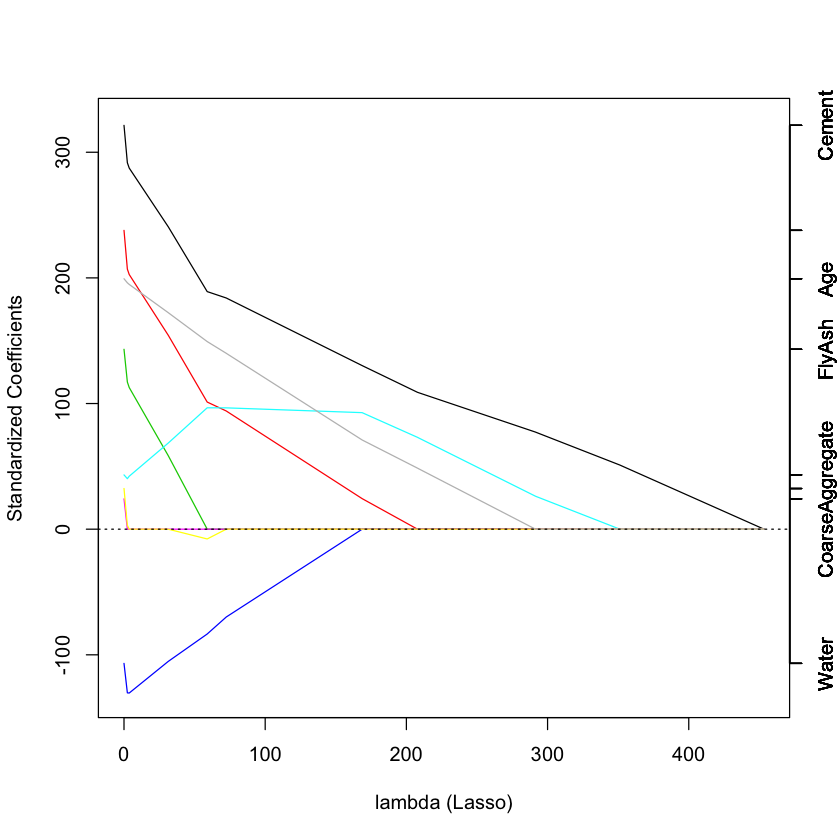

In [195]:
plot.enet(data$finalModel, xvar = "penalty", use.color = TRUE)

In [16]:
#######Problem 4
library(lubridate) # For year() function below
library(forecast)
library(quantmod)
dat = read.csv("~/data/R/gaData.csv")
training = dat[year(dat$date) < 2012,]
testing = dat[(year(dat$date)) > 2011,]
tstrain = ts(training$visitsTumblr)

In [18]:
smooth<-bats(tstrain)
fore<-forecast(smooth, nrow(testing))

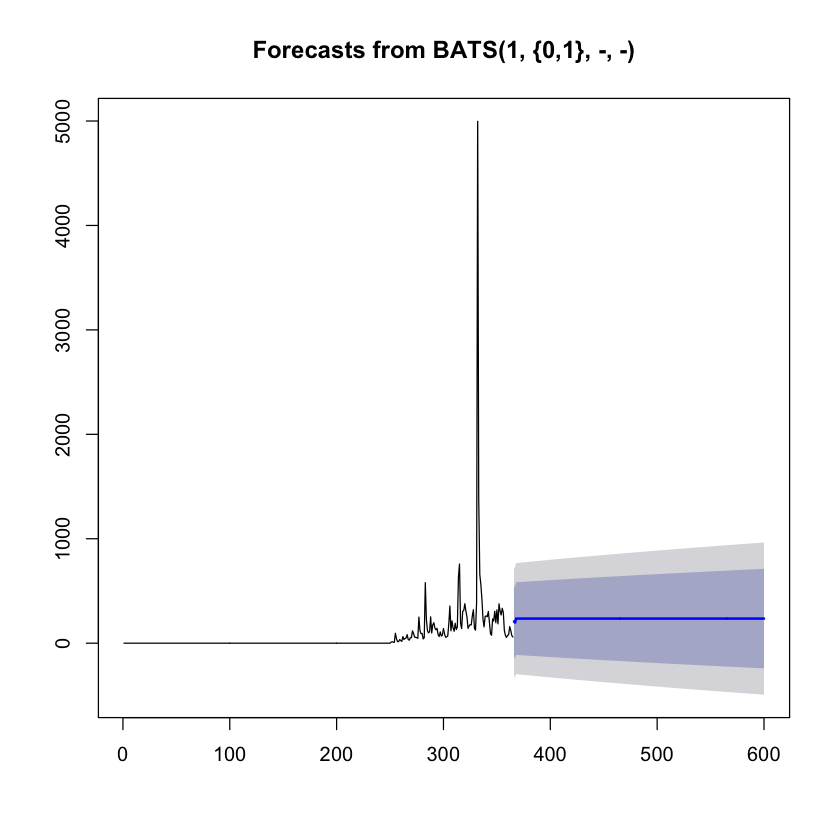

In [19]:
plot(fore)

In [20]:
fore_lower95 <- fore$lower[,2]
fore_upper95 <- fore$upper[,2]

In [22]:
table ( 
  (testing$visitsTumblr>fore_lower95) & 
  (testing$visitsTumblr<fore_upper95))


FALSE  TRUE 
    9   226 

In [23]:
226/235

[1] 0.9617021

In [6]:
########Problem 5
set.seed(3523)
library(caret)
library(AppliedPredictiveModeling)
data(concrete)
inTrain = createDataPartition(concrete$CompressiveStrength, p = 3/4)[[1]]
training = concrete[ inTrain,]
testing = concrete[-inTrain,]

In [7]:
set.seed(325)
library(e1071)

In [8]:
fit <- svm(CompressiveStrength ~ ., data = training)

In [9]:
pred<-predict(fit,testing)

In [11]:
sqrt(sum((pred-testing$CompressiveStrength)^2/length(pred)))

[1] 6.715009